In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam


# Dataset

In [2]:
df = pd.read_csv('well_data.csv', index_col=0)

## Split into training, validation and test data.

### Test data

In [3]:
test_set = df[2000:2500]

x_test = test_set.drop(columns='QTOT')
y_test = test_set[['QTOT']]

### Validation data

In [4]:
#train_val_set = df.copy().drop(test_set.index) 
train_val_set = df.iloc[0:250]

val_set = train_val_set.sample(frac=0.1, replace=False)

x_val = val_set.drop(columns='QTOT')
y_val = val_set[['QTOT']]

### Training data

In [5]:
train_set = train_val_set.copy().drop(val_set.index)

x_train = train_set.drop(columns='QTOT')
y_train = train_set[['QTOT']]

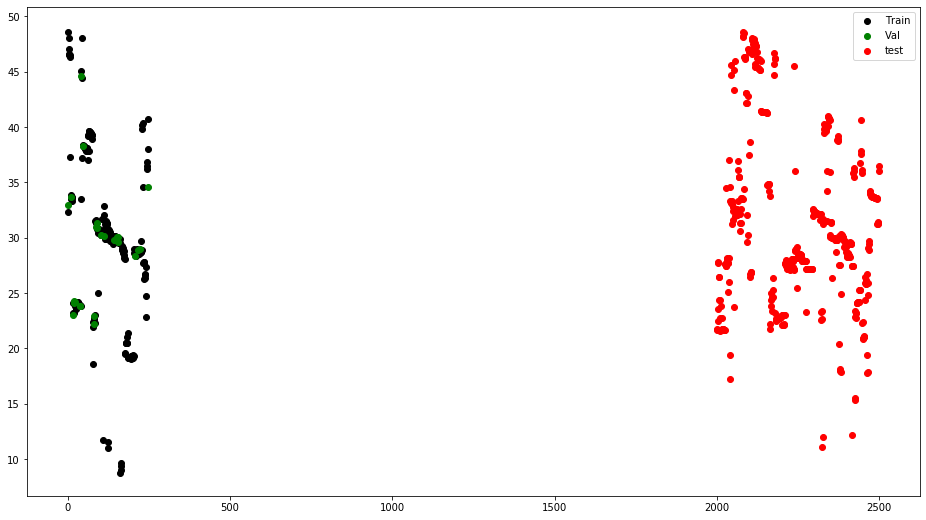

In [6]:
plt.figure(figsize=(16,9))
plt.scatter(y_train.index, y_train.values, color='black', label='Train')
plt.scatter(val_set.index, val_set['QTOT'], color='green', label='Val')
plt.scatter(y_test.index, y_test.values, color='red', label='test')
plt.legend()

# Simple model

In [7]:
from keras import regularizers

input_layer_size = x_train.columns.size

model = keras.Sequential()
model.add(keras.layers.Dense(input_layer_size, activation='relu', input_shape=(input_layer_size,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,259
Trainable params: 9,259
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [10]:
history = model.fit(x_train,y_train,validation_data=(x_val, y_val),epochs=400, batch_size=10,verbose=2)

Epoch 1/400
23/23 - 0s - loss: 908.2797 - val_loss: 842.6142
Epoch 2/400
23/23 - 0s - loss: 831.3185 - val_loss: 703.9044
Epoch 3/400
23/23 - 0s - loss: 591.2947 - val_loss: 347.4675
Epoch 4/400
23/23 - 0s - loss: 190.4690 - val_loss: 24.6420
Epoch 5/400
23/23 - 0s - loss: 44.4931 - val_loss: 22.4560
Epoch 6/400
23/23 - 0s - loss: 41.3062 - val_loss: 19.6317
Epoch 7/400
23/23 - 0s - loss: 39.4725 - val_loss: 18.9931
Epoch 8/400
23/23 - 0s - loss: 38.5333 - val_loss: 18.4152
Epoch 9/400
23/23 - 0s - loss: 37.0298 - val_loss: 17.6788
Epoch 10/400
23/23 - 0s - loss: 35.8022 - val_loss: 17.1227
Epoch 11/400
23/23 - 0s - loss: 33.9237 - val_loss: 16.4087
Epoch 12/400
23/23 - 0s - loss: 32.4906 - val_loss: 15.8765
Epoch 13/400
23/23 - 0s - loss: 30.5876 - val_loss: 15.0456
Epoch 14/400
23/23 - 0s - loss: 29.0463 - val_loss: 14.5113
Epoch 15/400
23/23 - 0s - loss: 27.8401 - val_loss: 13.7840
Epoch 16/400
23/23 - 0s - loss: 25.7757 - val_loss: 12.9721
Epoch 17/400
23/23 - 0s - loss: 23.9130 - 

Epoch 141/400
23/23 - 0s - loss: 2.0763 - val_loss: 3.4271
Epoch 142/400
23/23 - 0s - loss: 1.9588 - val_loss: 3.3640
Epoch 143/400
23/23 - 0s - loss: 1.9769 - val_loss: 3.7865
Epoch 144/400
23/23 - 0s - loss: 1.9347 - val_loss: 3.2947
Epoch 145/400
23/23 - 0s - loss: 1.9311 - val_loss: 3.3441
Epoch 146/400
23/23 - 0s - loss: 1.9291 - val_loss: 4.0297
Epoch 147/400
23/23 - 0s - loss: 1.8835 - val_loss: 3.5788
Epoch 148/400
23/23 - 0s - loss: 1.9047 - val_loss: 3.8444
Epoch 149/400
23/23 - 0s - loss: 1.8740 - val_loss: 3.7878
Epoch 150/400
23/23 - 0s - loss: 1.9235 - val_loss: 3.3214
Epoch 151/400
23/23 - 0s - loss: 1.9614 - val_loss: 3.2823
Epoch 152/400
23/23 - 0s - loss: 2.1352 - val_loss: 3.4633
Epoch 153/400
23/23 - 0s - loss: 2.0047 - val_loss: 3.4548
Epoch 154/400
23/23 - 0s - loss: 1.9263 - val_loss: 3.5037
Epoch 155/400
23/23 - 0s - loss: 2.1554 - val_loss: 3.2497
Epoch 156/400
23/23 - 0s - loss: 1.9241 - val_loss: 3.9943
Epoch 157/400
23/23 - 0s - loss: 2.0031 - val_loss: 3.34

Epoch 280/400
23/23 - 0s - loss: 1.6986 - val_loss: 3.3728
Epoch 281/400
23/23 - 0s - loss: 1.6582 - val_loss: 3.0484
Epoch 282/400
23/23 - 0s - loss: 1.7462 - val_loss: 3.1114
Epoch 283/400
23/23 - 0s - loss: 1.6950 - val_loss: 3.2762
Epoch 284/400
23/23 - 0s - loss: 1.6164 - val_loss: 3.3959
Epoch 285/400
23/23 - 0s - loss: 1.6642 - val_loss: 3.0336
Epoch 286/400
23/23 - 0s - loss: 1.6922 - val_loss: 3.1141
Epoch 287/400
23/23 - 0s - loss: 1.5838 - val_loss: 4.2590
Epoch 288/400
23/23 - 0s - loss: 1.9318 - val_loss: 2.9859
Epoch 289/400
23/23 - 0s - loss: 1.7329 - val_loss: 3.0194
Epoch 290/400
23/23 - 0s - loss: 1.7467 - val_loss: 3.2211
Epoch 291/400
23/23 - 0s - loss: 1.7302 - val_loss: 3.5732
Epoch 292/400
23/23 - 0s - loss: 1.8967 - val_loss: 3.0263
Epoch 293/400
23/23 - 0s - loss: 1.7969 - val_loss: 3.0624
Epoch 294/400
23/23 - 0s - loss: 1.6040 - val_loss: 3.3957
Epoch 295/400
23/23 - 0s - loss: 1.5861 - val_loss: 2.9866
Epoch 296/400
23/23 - 0s - loss: 1.6556 - val_loss: 3.32

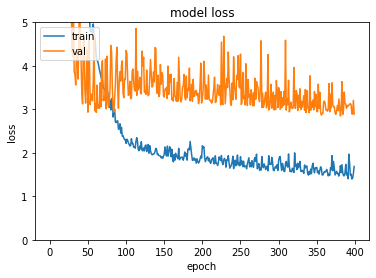

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0,5])
plt.show()

In [12]:
keras_predictions = model.predict(x_test, verbose=2)

16/16 - 0s


In [13]:

print("Error on test data simple model")
mse_test_simple = np.mean(np.power(keras_predictions - y_test.values, 2))
print("MSE: ", mse_test_simple) #2.6873526

mae_test_simple = np.mean(np.abs(keras_predictions-y_test.values))
print("MAE: ", mae_test_simple) # 1.12

mape_test_simple = 100*np.mean(np.abs(np.divide(keras_predictions - y_test.values, y_test.values)))
print("MAPE: ", mape_test_simple, "%") # 3.574



Error on test data simple model
MSE:  36.717855680250125
MAE:  5.703714261015099
MAPE:  20.47499585763946 %


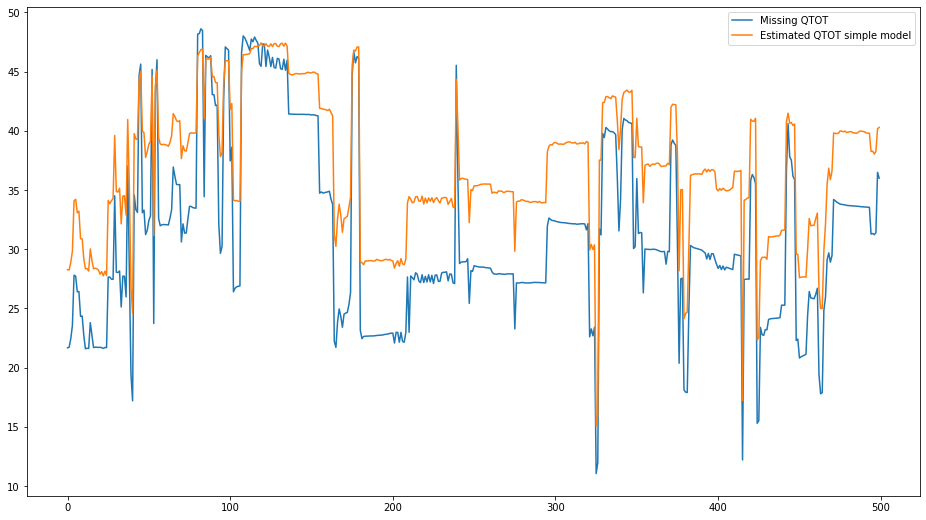

In [14]:
plt.figure(figsize=(16,9))
plt.plot(y_test.values, label='Missing QTOT')
plt.plot(keras_predictions, label='Estimated QTOT simple model')
plt.legend()

# Improve model

### Adding a dropout layer

In [15]:
from keras.layers import Dropout

input_layer_size = x_train.columns.size

improved_model = keras.Sequential()
improved_model.add(keras.layers.Dense(input_layer_size, activation='relu', input_shape=(input_layer_size,)))
improved_model.add(keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.4))
improved_model.add(keras.layers.Dense(1))

In [16]:
improved_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [17]:
improved_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

### Early stopping

In [18]:
from keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier

callback = EarlyStopping(monitor='val_loss', patience=3)


improved_history = improved_model.fit(x_train,y_train,validation_data=(x_val, y_val),epochs=400, batch_size=10, callbacks=[callback],verbose=2)

Epoch 1/400
23/23 - 0s - loss: 915.0772 - val_loss: 869.3828
Epoch 2/400
23/23 - 0s - loss: 905.5144 - val_loss: 859.6987
Epoch 3/400
23/23 - 0s - loss: 895.1119 - val_loss: 848.7198
Epoch 4/400
23/23 - 0s - loss: 882.8828 - val_loss: 835.4523
Epoch 5/400
23/23 - 0s - loss: 867.8922 - val_loss: 818.7442
Epoch 6/400
23/23 - 0s - loss: 849.0241 - val_loss: 798.4953
Epoch 7/400
23/23 - 0s - loss: 826.7617 - val_loss: 774.5775
Epoch 8/400
23/23 - 0s - loss: 800.0555 - val_loss: 745.6373
Epoch 9/400
23/23 - 0s - loss: 768.2277 - val_loss: 711.5414
Epoch 10/400
23/23 - 0s - loss: 731.2922 - val_loss: 672.2688
Epoch 11/400
23/23 - 0s - loss: 689.1795 - val_loss: 628.3329
Epoch 12/400
23/23 - 0s - loss: 642.5079 - val_loss: 579.9341
Epoch 13/400
23/23 - 0s - loss: 591.2841 - val_loss: 528.4033
Epoch 14/400
23/23 - 0s - loss: 537.4706 - val_loss: 473.3414
Epoch 15/400
23/23 - 0s - loss: 480.9850 - val_loss: 417.5142
Epoch 16/400
23/23 - 0s - loss: 423.9393 - val_loss: 361.6768
Epoch 17/400
23/2

Epoch 137/400
23/23 - 0s - loss: 33.7782 - val_loss: 16.8483
Epoch 138/400
23/23 - 0s - loss: 33.7020 - val_loss: 16.7742
Epoch 139/400
23/23 - 0s - loss: 33.4998 - val_loss: 16.7065
Epoch 140/400
23/23 - 0s - loss: 33.3042 - val_loss: 16.6367
Epoch 141/400
23/23 - 0s - loss: 33.2034 - val_loss: 16.5857
Epoch 142/400
23/23 - 0s - loss: 33.0214 - val_loss: 16.5257
Epoch 143/400
23/23 - 0s - loss: 32.8777 - val_loss: 16.4446
Epoch 144/400
23/23 - 0s - loss: 32.7724 - val_loss: 16.3853
Epoch 145/400
23/23 - 0s - loss: 32.7068 - val_loss: 16.3358
Epoch 146/400
23/23 - 0s - loss: 32.5572 - val_loss: 16.2761
Epoch 147/400
23/23 - 0s - loss: 32.3672 - val_loss: 16.2110
Epoch 148/400
23/23 - 0s - loss: 32.3043 - val_loss: 16.2080
Epoch 149/400
23/23 - 0s - loss: 32.1212 - val_loss: 16.0819
Epoch 150/400
23/23 - 0s - loss: 31.9702 - val_loss: 16.0101
Epoch 151/400
23/23 - 0s - loss: 31.8123 - val_loss: 15.9549
Epoch 152/400
23/23 - 0s - loss: 31.6921 - val_loss: 15.8843
Epoch 153/400
23/23 - 0s

23/23 - 0s - loss: 12.0319 - val_loss: 6.3010
Epoch 273/400
23/23 - 0s - loss: 11.9060 - val_loss: 6.2894
Epoch 274/400
23/23 - 0s - loss: 11.7789 - val_loss: 6.2360
Epoch 275/400
23/23 - 0s - loss: 11.6510 - val_loss: 6.0390
Epoch 276/400
23/23 - 0s - loss: 11.5155 - val_loss: 6.0340
Epoch 277/400
23/23 - 0s - loss: 11.4347 - val_loss: 5.9185
Epoch 278/400
23/23 - 0s - loss: 11.2763 - val_loss: 5.9580
Epoch 279/400
23/23 - 0s - loss: 11.1277 - val_loss: 5.8388
Epoch 280/400
23/23 - 0s - loss: 11.0453 - val_loss: 5.8379
Epoch 281/400
23/23 - 0s - loss: 10.8965 - val_loss: 5.6817
Epoch 282/400
23/23 - 0s - loss: 10.7795 - val_loss: 5.6296
Epoch 283/400
23/23 - 0s - loss: 10.6861 - val_loss: 5.6238
Epoch 284/400
23/23 - 0s - loss: 10.5939 - val_loss: 5.5233
Epoch 285/400
23/23 - 0s - loss: 10.4293 - val_loss: 5.3475
Epoch 286/400
23/23 - 0s - loss: 10.3393 - val_loss: 5.3698
Epoch 287/400
23/23 - 0s - loss: 10.2864 - val_loss: 5.3366
Epoch 288/400
23/23 - 0s - loss: 10.1408 - val_loss: 5

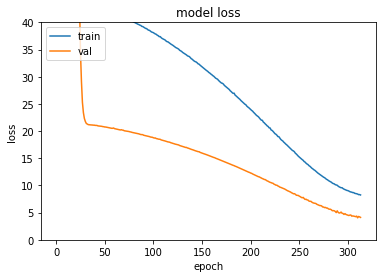

In [19]:
plt.plot(improved_history.history['loss'])
plt.plot(improved_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
axes = plt.gca()
axes.set_ylim([0,40])
plt.show()

In [20]:
improved_keras_predictions = improved_model.predict(x_test, verbose=2)

16/16 - 0s


In [21]:

print("Error on test data improved model")
mse_test_improved = np.mean(np.power(improved_keras_predictions - y_test.values, 2))
print("MSE: ", mse_test_improved) #2.6873526

mae_test_improved = np.mean(np.abs(improved_keras_predictions-y_test.values))
print("MAE: ", mae_test_improved) # 1.12

mape_test_improved = 100*np.mean(np.abs(np.divide(improved_keras_predictions - y_test.values, y_test.values)))
print("MAPE: ", mape_test_improved, "%") # 3.574



Error on test data improved model
MSE:  19.545097749845272
MAE:  4.138877221193228
MAPE:  14.81619663138838 %


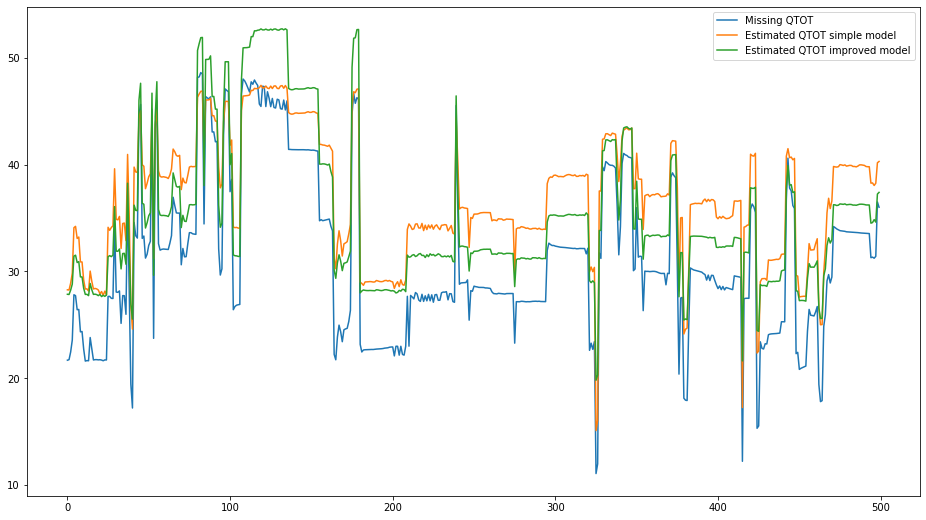

In [22]:
plt.figure(figsize=(16,9))
plt.plot(y_test.values, label='Missing QTOT')
plt.plot(keras_predictions, label='Estimated QTOT simple model')
plt.plot(improved_keras_predictions, label='Estimated QTOT improved model')
plt.legend()

In [23]:
import numpy as np
from tabulate import tabulate

m = np.array([["MSE", mse_test_simple, mse_test_improved],["MAE", mae_test_simple, mae_test_improved ],["MAPE", mape_test_simple, mape_test_improved]]);

headers = ["old", "new"]

table = tabulate(m, headers, tablefmt="fancy_grid")

print(table)


╒══════╤══════════╤══════════╕
│      │      old │      new │
╞══════╪══════════╪══════════╡
│ MSE  │ 36.7179  │ 19.5451  │
├──────┼──────────┼──────────┤
│ MAE  │  5.70371 │  4.13888 │
├──────┼──────────┼──────────┤
│ MAPE │ 20.475   │ 14.8162  │
╘══════╧══════════╧══════════╛
